Roll No: 200102105

Name: Yashi Natu 

Course: DA623 - Computing With Signals

Image approximation is a technique used to represent an image in a compressed or simplified form while preserving its essential features. 

In this case, we are dealing with a **colored image** of size `512x512` pixels, where each pixel is represented by three color channels: red, green, and blue (RGB). The total size of the image data is `512x512x3`.
The goal is to perform a low-rank approximation of the image, which means representing the image data using a smaller number of linearly independent components or basis vectors.

To begin with, we can represent the image as a matrix M, where each column vector $c_i$ represents the pixel values of a single column in the image. In this case, each $c_i$ is a vector in $R^{512}$, representing the pixel values for all three color channels (RGB) in that column.


Mathematically, this can be written as:
$$ M = [c_1 | c_2 | c_3 | c_4 ... ] $$


If the columns of M are linearly independent, they form a basis in $ R^(512×512) $.
The objective is to find a different basis, denoted as B, such that the matrix M can be expressed as:
$$ M = B × C $$
Where B is a matrix whose columns represent the new basis vectors, and C is a matrix containing the coefficients that represent the original image data in this new basis.

If the dimension of the new basis $ B $ is smaller than the original basis (columns of M), it means that we are projecting each column vector $c_i$ onto a lower-dimensional subspace spanned by the columns of $ B $. 
The new basis B can be obtained using techniques such as Principal Component Analysis (PCA), Gram-Schmidt orthogonalization, or Discrete Fourier Transform (DFT). These methods aim to find a set of linearly independent vectors that can best represent the image data in a lower-dimensional subspace, effectively compressing the image while retaining its essential features.

Once we have obtained the new basis $ B $, we need to represent each column vector $ c_i $ of the original image matrix M in terms of this new basis. This process is known as projecting the vectors onto the subspace spanned by the columns of B.

To project a vector c_i onto the subspace defined by the basis B, we can decompose c_i into two components:
1) The component that lies within the subspace spanned by the columns of B.
2) The component that is orthogonal (perpendicular) to the subspace spanned by the columns of B.

Mathematically, we can express this as:
$$ c_i = (B × x_i) + (c_i - B × x_i) $$
Where:

$ B × x_i $ represents the component of $ c_i $ that lies within the subspace spanned by the columns of $ B $.
$ (c_i - B × x_i) $ represents the component of $ c_i $ that is orthogonal to the subspace spanned by the columns of $ B $.

The coefficients $ x_i $ are chosen such that the orthogonal component $ (c_i - B × x_i) $ is minimized in length or magnitude. This ensures that the projection $ B × x_i $ is as close as possible to the original vector $ c_i $ within the subspace defined by B.

By finding the optimal coefficients $ x_i $ for each column vector $ c_i $, we can represent the entire image matrix $ M $ in terms of the new basis B and the coefficient matrix $ C $, where each column of $ C $ contains the corresponding $ x_i $ coefficients.

The product $ B × x_i $ can be considered the compressed or approximated version of the original image column $ c_i $, as it represents the best approximation of $c_i$ within the lower-dimensional subspace spanned by the columns of B.

This projection process effectively maps the high-dimensional image data onto a lower-dimensional subspace, allowing for a more compact representation while retaining the essential features of the image.

By representing the image data in this compressed form $ (B × C) $, we can achieve a more efficient storage and transmission of the image, as well as potentially enable faster processing for certain image analysis tasks.

In [11]:
def read_image(file_path, target_size=(512, 512)):
   """
   Load an image from the specified file path and resize it to the target size.

   Args:
       file_path (str): The path to the image file.
       target_size (tuple, optional): The desired size of the resized image (width, height). Defaults to (512, 512).

   Returns:
       numpy.ndarray: The resized image as a NumPy array.
   """
   from PIL import Image
   import numpy as np

   # Open the image file
   image = Image.open(file_path)
   
   # Resize the image to the target size using bilinear resampling
   resized_image = image.resize(target_size, resample=Image.BILINEAR)

   # Split the image into its red, green, and blue channels
   red_channel, green_channel, blue_channel = resized_image.split()

   # Convert the resized image to a NumPy array
   return np.array(red_channel), np.array(green_channel), np.array(blue_channel)

In [12]:
from PIL import Image
import numpy as np

def merge_image(red_channel, green_channel, blue_channel):
    """
    Merge the red, green, and blue channels into a single color image and display it.
    
    Args:
        red_channel (numpy.ndarray): The red channel of the image.
        green_channel (numpy.ndarray): The green channel of the image.
        blue_channel (numpy.ndarray): The blue channel of the image.
        
    Returns:
        None
    """
    red_channel = np.clip(red_channel, 0, 255).astype(np.uint8)
    green_channel = np.clip(green_channel, 0, 255).astype(np.uint8)
    blue_channel = np.clip(blue_channel, 0, 255).astype(np.uint8)

    # Convert the NumPy arrays to Image objects
    red_channel = Image.fromarray(red_channel)
    green_channel = Image.fromarray(green_channel)
    blue_channel = Image.fromarray(blue_channel)

    # Merge the channels back into a single image
    merged_image = Image.merge("RGB", (red_channel, green_channel, blue_channel))

    display(merged_image)

Let's try reading a image and see how it looks

In [13]:
read_image("./image.jpeg")

(array([[151, 155, 152, ...,  10,  10,   9],
        [153, 155, 149, ...,  10,  11,  10],
        [155, 154, 144, ...,   9,   9,  10],
        ...,
        [108, 108, 108, ...,  20,  23,  18],
        [105, 105, 106, ...,  20,  21,  17],
        [103, 103, 104, ...,  21,  20,  18]], dtype=uint8),
 array([[176, 179, 176, ...,  15,  15,  15],
        [177, 179, 173, ...,  15,  15,  15],
        [179, 178, 169, ...,  15,  15,  15],
        ...,
        [111, 111, 111, ...,  15,  18,  14],
        [108, 108, 109, ...,  15,  17,  13],
        [106, 106, 107, ...,  17,  17,  16]], dtype=uint8),
 array([[ 98, 101,  98, ...,   4,   5,   5],
        [ 99, 100,  95, ...,   4,   5,   5],
        [102, 100,  90, ...,   5,   4,   4],
        ...,
        [ 91,  91,  92, ...,   8,   9,   6],
        [ 88,  88,  89, ...,   8,  11,   7],
        [ 86,  87,  87, ...,  11,  11,  10]], dtype=uint8))

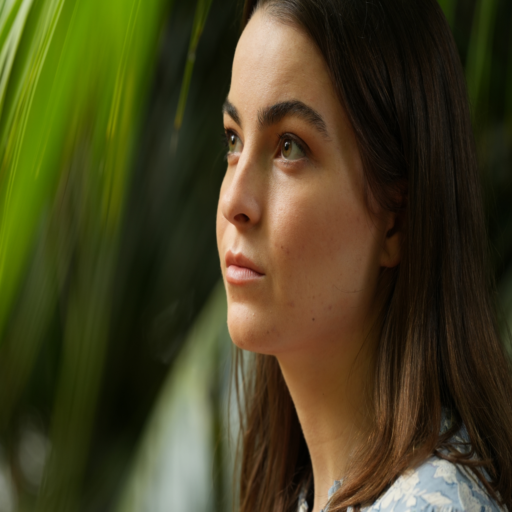

In [14]:
r, g, b = read_image("./image.jpeg")
merge_image(r, g, b)

# Principal Component Analysis (PCA)
Let's consider an image represented as an $ n × n $ matrix:
$$ X = [x_1| x_2| ...| x_n] $$
where $x_i$ is a n-dimensional column vector.

1) Mean Centering: The first step in PCA is to center the data by subtracting the mean vector from each observation:
    $$ X_{centered} = X - mean(X) $$

2) Covariance Matrix: Next, we calculate the covariance matrix of the centered data:
    $$ Σ = (1/n) * X_{centered}^T * X_{centered} $$

The covariance matrix $Σ$ is a $n × n$ matrix that captures the variance and covariance between the columns.

3) Eigendecomposition: We perform an eigendecomposition on the covariance matrix to find its eigenvectors and eigenvalues:
    $$ Σ * v_i = λ_i * v_i $$
    
where $v_i$ is the ith eigenvector, and $λ_i$ is the corresponding eigenvalue.

4) Sorting Eigenvectors: The eigenvectors are sorted in descending order based on their corresponding eigenvalues. The eigenvector with the highest eigenvalue represents the direction of maximum variance in the data, and subsequent eigenvectors represent the directions of decreasing variance.

5) Selecting Principal Components: We select the top k eigenvectors, where k is the desired number of principal components. These eigenvectors form the new basis for the lower-dimensional subspace.

6) Projecting Data: Finally, the original data is projected onto the lower-dimensional subspace spanned by the selected principal components:

$$ X_{projected} = X_{centered} * V $$

where V is a $n × k$ matrix containing the top $k$ eigenvectors as columns.

In [15]:
from numpy.linalg import eig
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from IPython.display import display

def pca(X, k):
    """
    Perform principal component analysis on the input data.

    Args:
        X (numpy.ndarray): The data matrix with shape (n, n).
        k (int): The number of principal components to select.

    Returns:
        numpy.ndarray: The reconstructed data using the top k eigenvectors
    """
    # Calculate the mean of the data
    mean = np.mean(X, axis=0)

    # Center the data
    X_centered = X - mean

    # Compute the covariance matrix
    cov_matrix = np.cov(X_centered.T)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    # Project the data onto the selected eigenvectors
    X_pca = np.dot(X_centered, selected_eigenvectors)

    # Reconstruct the data using the selected eigenvectors
    X_reconstructed = np.dot(X_pca, selected_eigenvectors.T) + mean
    
    return X_reconstructed


In [16]:
r, g, b = read_image("./image.jpeg")

# Set the initial value of k
k = 20

# Create a slider widget for k
k_slider = widgets.IntSlider(min=1, max=512, step=1, value=k, description='k')

# Define a function to update the image based on the slider value
def display_image(k):
    r_pca = pca(r, k)
    g_pca = pca(g, k)
    b_pca = pca(b, k)

    merge_image(r_pca, g_pca, b_pca)

interactive_plot = interactive(display_image, k=k_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=20, description='k', max=512, min=1), Output()), _dom_classes=('widget-i…

# Gram-Schmidt Orthogonalization
The Gram-Schmidt process constructs an orthonormal basis $Q$ from the set of input vectors in $X$. The basis $Q$ is an $(n \times n)$ matrix, where each column represents an orthonormal vector. The columns of Q form an orthonormal set of vectors that span the same vector space as the original data X. The Gram-Schmidt process works by iteratively constructing orthogonal vectors from the input vectors. For each input vector, its projection onto the subspace spanned by the previously constructed orthogonal vectors is subtracted, and the remaining component is normalized to obtain a new orthogonal vector. This process is repeated until all input vectors have been processed, resulting in an orthonormal basis Q.

Consider $$ Q = [q_1|q_2|...|q_n] $$

1) Let $q_1$ = $x_1$ (the first column of $X$).
2) For $i = 2, 3, ..., m$:

    - $ v_i = x_i $(the i-th column of $X$)
    - For $j = 1, 2, ..., i-1$:
        
        * Project $v_i$ onto $q_j$: $$p_{ij} = (v_i  qⱼ) / (q_j  q_j) * q_j $$
        * Subtract the projection from $v_i$: $$v_i = v_i - p_{ij}$$
    - Normalize $$ vᵢ: qᵢ = vᵢ / ||vᵢ|| $$


After we got the basis, the process is similar. Just choose the top $k$ ones.

In [17]:
def gram_schmidt_compression(X, k):
    """
    Perform Gram-Schmidt orthogonalization on a set of vectors and reconstruct
    the compressed data using the top k orthogonal vectors.

    Args:
        X (numpy.ndarray): A matrix with shape (n, n), where n is the number of vectors
        k (int): The number of orthogonal vectors to use for reconstruction.

    Returns:
        numpy.ndarray: The reconstructed data using the top k orthogonal vectors.
    """
    n, m = X.shape
    basis = np.zeros((m, m))

    # Perform Gram-Schmidt orthogonalization
    for i in range(m):
        w = X[:, i]
        for j in range(i):
            u = basis[:, j]
            projection = np.dot(w, u) / np.dot(u, u) * u
            w = w - projection
        if np.linalg.norm(w) > 1e-10:
            w = w / np.linalg.norm(w)
        basis[:, i] = w

    # Select the top k orthogonal vectors
    basis = basis[:, :k]

    # Project the data onto the subspace spanned by the top k orthogonal vectors
    coeff = np.dot(basis.T, X.T).T

    # Reconstruct the data using the top k orthogonal vectors
    compressed = np.dot(coeff, basis.T)

    return compressed

In [18]:
r, g, b = read_image("./image.jpeg")

# Set the initial value of k
k = 20

# Create a slider widget for k
k_slider = widgets.IntSlider(min=1, max=512, step=1, value=k, description='k')

# Define a function to update the image based on the slider value
def display_image(k):
    r_gram_schmidt = gram_schmidt_compression(r, k)
    g_gram_schmidt = gram_schmidt_compression(g, k)
    b_gram_schmidt = gram_schmidt_compression(b, k)

    merge_image(r_gram_schmidt, g_gram_schmidt, b_gram_schmidt)

interactive_plot = interactive(display_image, k=k_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=20, description='k', max=512, min=1), Output()), _dom_classes=('widget-i…

# Discrete Fourier Transform
Consider an image represented as an $ n × n $ matrix:
$$ X = [x_1​∣x_2​∣...∣x_n​] $$
where each $x_i$ is an n-dimensional column vector representing a row of pixels in the image.

1) Discretization: The first step in DFT-based image compression is to discretize the image into a finite set of pixels. Each pixel represents the intensity or color at a specific location in the image.

2) Transforming into Frequency Domain: The DFT converts the image from the spatial domain to the frequency domain. This transformation decomposes the image into a combination of sinusoidal basis functions of different frequencies and magnitudes.

3) Calculating DFT Coefficients: The DFT computes the coefficients that represent the contribution of each frequency component to the image. These coefficients are complex numbers and indicate the magnitude and phase of each frequency component.

We then keep only the top k columns of the DFT basis matrix

In [19]:
def dft(X, k):
    """
    Perform Discrete Fourier Transform on the input image.

    Args:
        X (numpy.ndarray): The input image with shape (n, n).
        k (int): The number of frequency components to select.

    Returns:
        numpy.ndarray: The reconstructed image using the top k frequency components.
    """
    # Compute the 2D Discrete Fourier Transform of the input image
    dft_matrix = np.fft.fft2(X)

    # Create a mask to keep only the top k columns of the DFT basis matrix
    mask = np.zeros_like(dft_matrix)
    mask[:, :k] = 1

    # Apply the mask to the DFT coefficients
    compressed_matrix = dft_matrix * mask

    # Reconstruct the compressed image using the inverse DFT
    compressed_img = np.fft.ifft2(compressed_matrix).real

    return compressed_img

In [20]:
r, g, b = read_image("./image.jpeg")

# Set the initial value of k
k = 20

# Create a slider widget for k
k_slider = widgets.IntSlider(min=1, max=512, step=1, value=k, description='k')

# Define a function to update the image based on the slider value
def display_image(k):
    r_dft = dft(r, k)
    g_dft = dft(g, k)
    b_dft = dft(b, k)

    merge_image(r_dft, g_dft, b_dft)

interactive_plot = interactive(display_image, k=k_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=20, description='k', max=512, min=1), Output()), _dom_classes=('widget-i…